In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [74]:
pnls = {}
pnls['pnl_debt_ebitda'] = pd.read_csv('data/US/strat_debt_ebitda_pnl.csv').set_index('Unnamed: 0')
pnls['pnl_decay'] = pd.read_csv('data/US/strat_decay_pnl.csv').set_index('Unnamed: 0')
pnls['pnl_EM'] = pd.read_csv('data/US/strat_EM_pnl.csv').set_index('Unnamed: 0')
pnls['pnl_eps_cfo'] = pd.read_csv('data/US/strat_eps_cfo_pnl.csv').set_index('Unnamed: 0')
pnls['pnl_eps_surprise'] = pd.read_csv('data/US/strat_eps_surprise_pnl.csv').set_index('Unnamed: 0')
pnls['pnl_eps_uo'] = pd.read_csv('data/US/strat_eps_uo_pnl.csv').set_index('Unnamed: 0')
pnls['pnl_industry'] = pd.read_csv('data/US/strat_industry_pnl.csv').set_index('Unnamed: 0')
pnls['pnl_pb_ratio'] = pd.read_csv('data/US/strat_pb_ratio_pnl.csv').set_index('Unnamed: 0')
pnls['pnl_sinewave'] = pd.read_csv('data/US/strat_sinewave_pnl.csv').set_index('Unnamed: 0')
pnls['pnl_slope'] = pd.read_csv('data/US/strat_slope_pnl.csv').set_index('Unnamed: 0')
pnls['pnl_ssf'] = pd.read_csv('data/US/strat_ssf_pnl.csv').set_index('Unnamed: 0')

pnls = pd.concat(pnls,axis=1).droplevel(1,axis=1).sort_index()
pnls.index.name = 'Date'
pnls

,pnl_debt_ebitda,pnl_decay,pnl_EM,pnl_eps_cfo,pnl_eps_surprise,pnl_eps_uo,pnl_industry,pnl_pb_ratio,pnl_sinewave,pnl_slope,pnl_ssf
Date,,,,,,,,,,,
2008-01-01,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000
2008-01-02,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000
2008-01-03,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000
2008-01-04,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000
2008-01-07,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,NaN,0.001364,0.001878,0.001465,0.000081,-0.000679,NaN,-0.000372,0.001653,0.002382,0.002065
2023-04-03,NaN,0.002188,0.000119,0.000718,0.000118,-0.000210,NaN,0.000109,0.001415,0.001738,0.002407
2023-04-04,NaN,-0.005740,-0.003937,0.000504,0.000164,-0.002219,NaN,0.000212,-0.001437,0.000341,-0.002107


In [72]:
pnls.corr().style.background_gradient(cmap = 'RdYlGn')

,pnl_debt_ebitda,pnl_decay,pnl_EM,pnl_eps_cfo,pnl_eps_surprise,pnl_eps_uo,pnl_industry,pnl_pb_ratio,pnl_sinewave,pnl_slope,pnl_ssf
pnl_debt_ebitda,1.000000,-0.037568,0.365351,-0.404066,0.221944,0.465265,0.153321,-0.063482,-0.074330,0.042490,-0.025345
pnl_decay,-0.037568,1.000000,0.452168,0.001705,-0.000022,0.037816,0.438918,0.609723,0.781225,0.505805,0.764647
pnl_EM,0.365351,0.452168,1.000000,-0.118199,0.068532,0.119707,0.292241,0.295260,0.551902,0.508492,0.584560
pnl_eps_cfo,-0.404066,0.001705,-0.118199,1.000000,-0.022531,-0.054857,-0.231350,0.001381,-0.004000,-0.010838,-0.006884
pnl_eps_surprise,0.221944,-0.000022,0.068532,-0.022531,1.000000,0.368487,0.079017,0.054357,0.002165,0.021212,0.007523
pnl_eps_uo,0.465265,0.037816,0.119707,-0.054857,0.368487,1.000000,0.189425,0.056507,0.034701,0.054239,0.042175
pnl_industry,0.153321,0.438918,0.292241,-0.231350,0.079017,0.189425,1.000000,0.317742,0.384792,0.241308,0.361381
pnl_pb_ratio,-0.063482,0.609723,0.295260,0.001381,0.054357,0.056507,0.317742,1.000000,0.594204,0.404315,0.608711
pnl_sinewave,-0.074330,0.781225,0.551902,-0.004000,0.002165,0.034701,0.384792,0.594204,1.000000,0.634209,0.887100
pnl_slope,0.042490,0.505805,0.508492,-0.010838,0.021212,0.054239,0.241308,0.404315,0.634209,1.000000,0.711087


In [76]:
from quantstats.stats import sharpe
pnls.columns = ['{0} |Sharpe = {1}'.format(pnl,str(np.round(sharpe(pnls[pnl].dropna()),3))) for pnl in pnls.columns]


<Axes: xlabel='Date'>

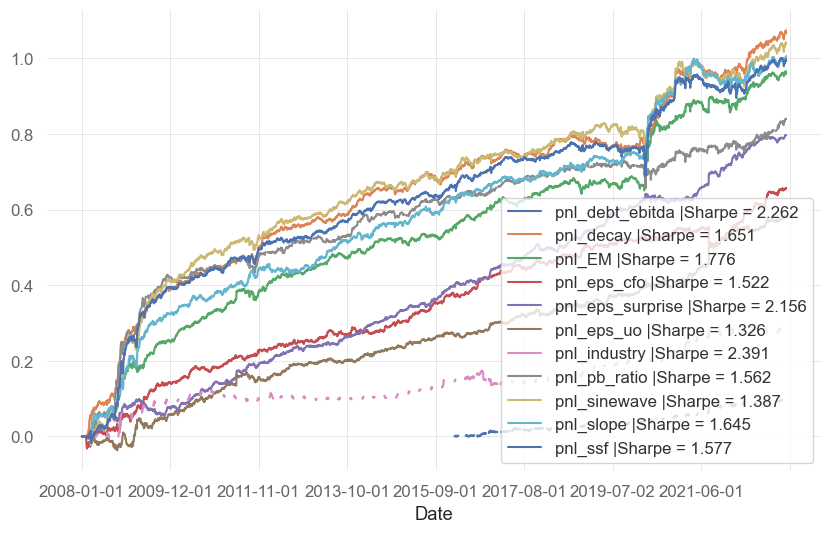

In [77]:
pnls.cumsum().plot()